In [851]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [852]:
df=pd.read_csv("TrainDataset.csv")

In [853]:
df.head()

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


In [854]:
print(df.isnull().sum())
len(df)

v1    0
v2    0
dtype: int64


4457

In [855]:
df['v1'].value_counts()

ham     3868
spam     589
Name: v1, dtype: int64

In [856]:
ham = df[df["v1"]=="ham"]
ham

,v1,v2
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."
5,ham,Hey u still at the gym?
...,...,...
4452,ham,Good. Good job. I like entrepreneurs
4453,ham,Living is very simple.. Loving is also simple....
4454,ham,Msgs r not time pass.They silently say that I ...
4455,ham,What is this 'hex' place you talk of? Explain!


In [857]:
spam = df[df["v1"]=="spam"]
spam

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
9,spam,December only! Had your mobile 11mths+? You ar...
15,spam,"UpgrdCentre Orange customer, you may now claim..."
19,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
29,spam,Double mins and txts 4 6months FREE Bluetooth ...
...,...,...
4412,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
4417,spam,IMPORTANT MESSAGE. This is a final contact att...
4429,spam,FreeMsg Hi baby wow just got a new cam moby. W...
4443,spam,You've won tkts to the EURO2004 CUP FINAL or å...


In [858]:
ham.shape, spam.shape

((3868, 2), (589, 2))

In [859]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((589, 2), (589, 2))

In [860]:
data = ham.append(spam, ignore_index=True)
print(data.head())
print(data.tail())

    v1                                                 v2
0  ham                          Ya tel, wats ur problem..
1  ham  Dear all, as we know  &lt;#&gt; th is the  &lt...
2  ham               Probably gonna swing by in a wee bit
3  ham                            Fine am simply sitting.
4  ham  Hello, yeah i've just got out of the bath and ...
        v1                                                 v2
1173  spam  You have won ?1,000 cash or a ?2,000 prize! To...
1174  spam  IMPORTANT MESSAGE. This is a final contact att...
1175  spam  FreeMsg Hi baby wow just got a new cam moby. W...
1176  spam  You've won tkts to the EURO2004 CUP FINAL or å...
1177  spam  Text PASS to 69669 to collect your polyphonic ...


In [861]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [862]:
X_train, X_test, y_train, y_test = train_test_split(data["v2"], data["v1"], test_size=0.3, random_state=0, shuffle=True, stratify=data["v1"])

In [863]:
vectorizer = TfidfVectorizer()

In [864]:
X_train = vectorizer.fit_transform(X_train)
X_train.shape

(824, 3317)

In [865]:
### Random Forest

In [866]:
clf_rf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [867]:
X_train, X_test, y_train, y_test = train_test_split(data["v2"], data["v1"], test_size=0.3, random_state=0, shuffle=True, stratify=data["v1"])

In [868]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [869]:
y_pred = clf_rf.predict(X_test)

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


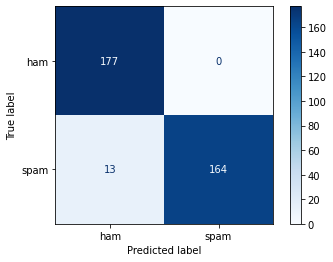

array([[177,   0],
       [ 13, 164]], dtype=int64)

In [870]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_rf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
confusion_matrix(y_test, y_pred)

In [871]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       177
        spam       1.00      0.93      0.96       177

    accuracy                           0.96       354
   macro avg       0.97      0.96      0.96       354
weighted avg       0.97      0.96      0.96       354

0.963276836158192


In [872]:
clf_rf.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [873]:
### SVM

In [874]:
clf_svm = Pipeline([("tfidf", TfidfVectorizer()), ("clf", SVC(C=100, gamma="auto"))])

In [875]:
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=100, gamma='auto'))])

In [876]:
y_pred = clf_svm.predict(X_test)

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


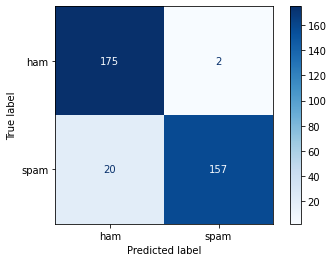

array([[175,   2],
       [ 20, 157]], dtype=int64)

In [877]:
plot_confusion_matrix(clf_svm, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
confusion_matrix(y_test, y_pred)

In [878]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       177
        spam       0.99      0.89      0.93       177

    accuracy                           0.94       354
   macro avg       0.94      0.94      0.94       354
weighted avg       0.94      0.94      0.94       354

0.9378531073446328


In [879]:
clf_svm.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype=object)

In [880]:
### Naive Bayes

In [881]:
from sklearn.naive_bayes import MultinomialNB

clf_mnb= Pipeline([("tfidf", TfidfVectorizer()), ("mnb", MultinomialNB())])
clf_mnb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [882]:
y_pred = clf_mnb.predict(X_test)

C:\Anaconda3\envs\sms_spam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


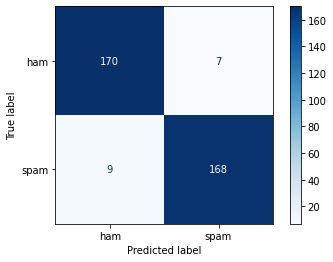

array([[170,   7],
       [  9, 168]], dtype=int64)

In [883]:
plot_confusion_matrix(clf_mnb, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
confusion_matrix(y_test, y_pred)

In [884]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.96      0.96       177
        spam       0.96      0.95      0.95       177

    accuracy                           0.95       354
   macro avg       0.95      0.95      0.95       354
weighted avg       0.95      0.95      0.95       354

0.9548022598870056


In [885]:
clf_mnb.predict(["You have won a free ticket for USA. Text to 123456"])

array(['spam'], dtype='<U4')